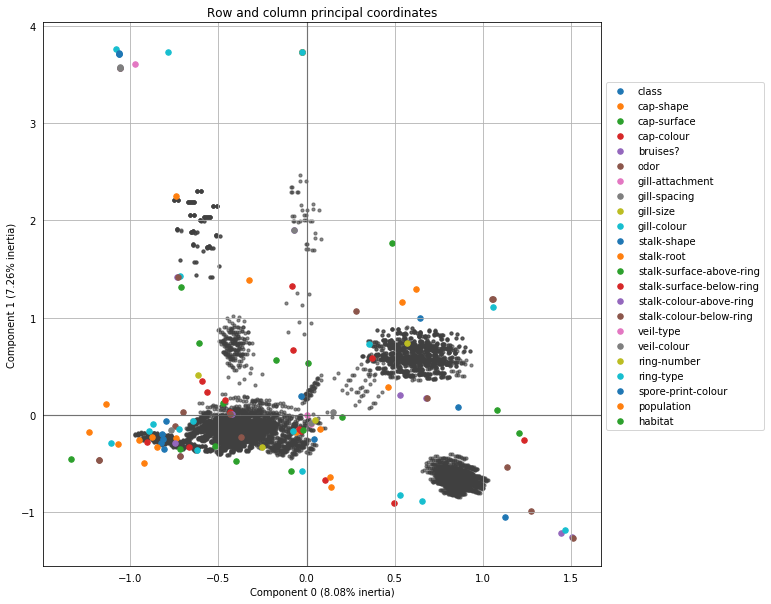

In [3]:
import prince
import pandas as pd
import numpy as np

feature_names = ["class","cap-shape","cap-surface","cap-colour","bruises?","odor","gill-attachment","gill-spacing","gill-size","gill-colour","stalk-shape","stalk-root","stalk-surface-above-ring","stalk-surface-below-ring","stalk-colour-above-ring","stalk-colour-below-ring","veil-type","veil-colour","ring-number","ring-type","spore-print-colour","population","habitat"]
data = pd.read_csv('agaricus-lepiota.data', header=None, names = feature_names)
# for testing plot
# data = data.head(10)

mca = prince.MCA(n_components=4, n_iter=3, copy=True, engine='auto', random_state=0)
mca = mca.fit(data)

ax = mca.plot_principal_coordinates(X=data, ax=None, figsize=(10, 10), show_row_points=True, row_points_size=10, show_row_labels=False, show_column_points=True, column_points_size=30, show_column_labels=False, legend_n_cols=2)

ax.legend().set_visible(False)
ax.legend(bbox_to_anchor=(1, 0.9))
ax.get_figure().savefig('mca_principal_coordinates.png')

<Figure size 432x288 with 0 Axes>

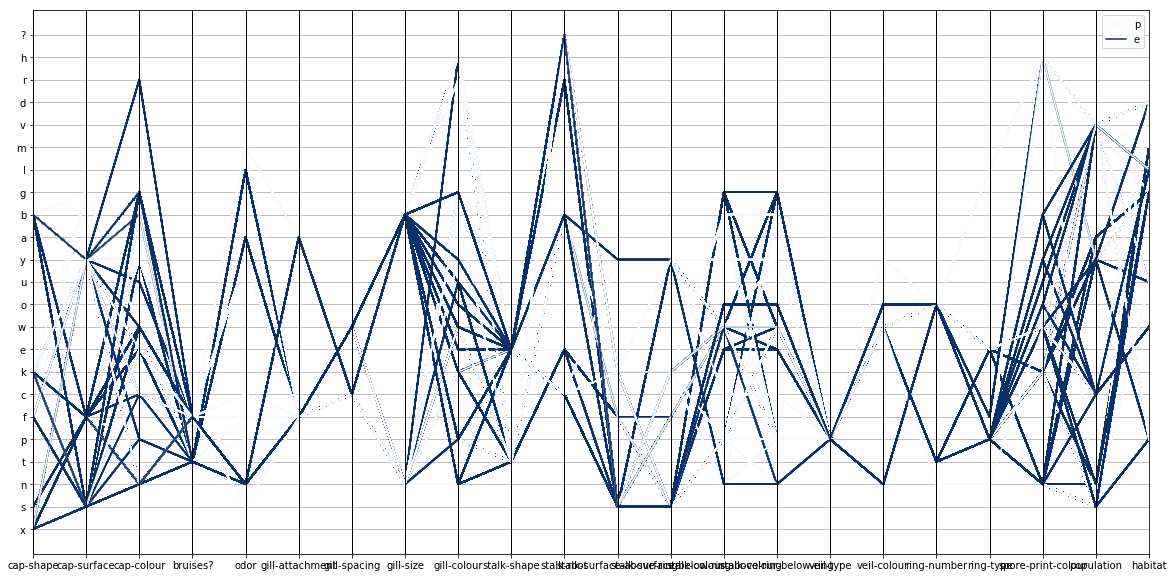

In [6]:
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt

plt.figure()
plt.figure(figsize=(20,10))
parallel_coordinates(data, 'class',colormap='Blues')

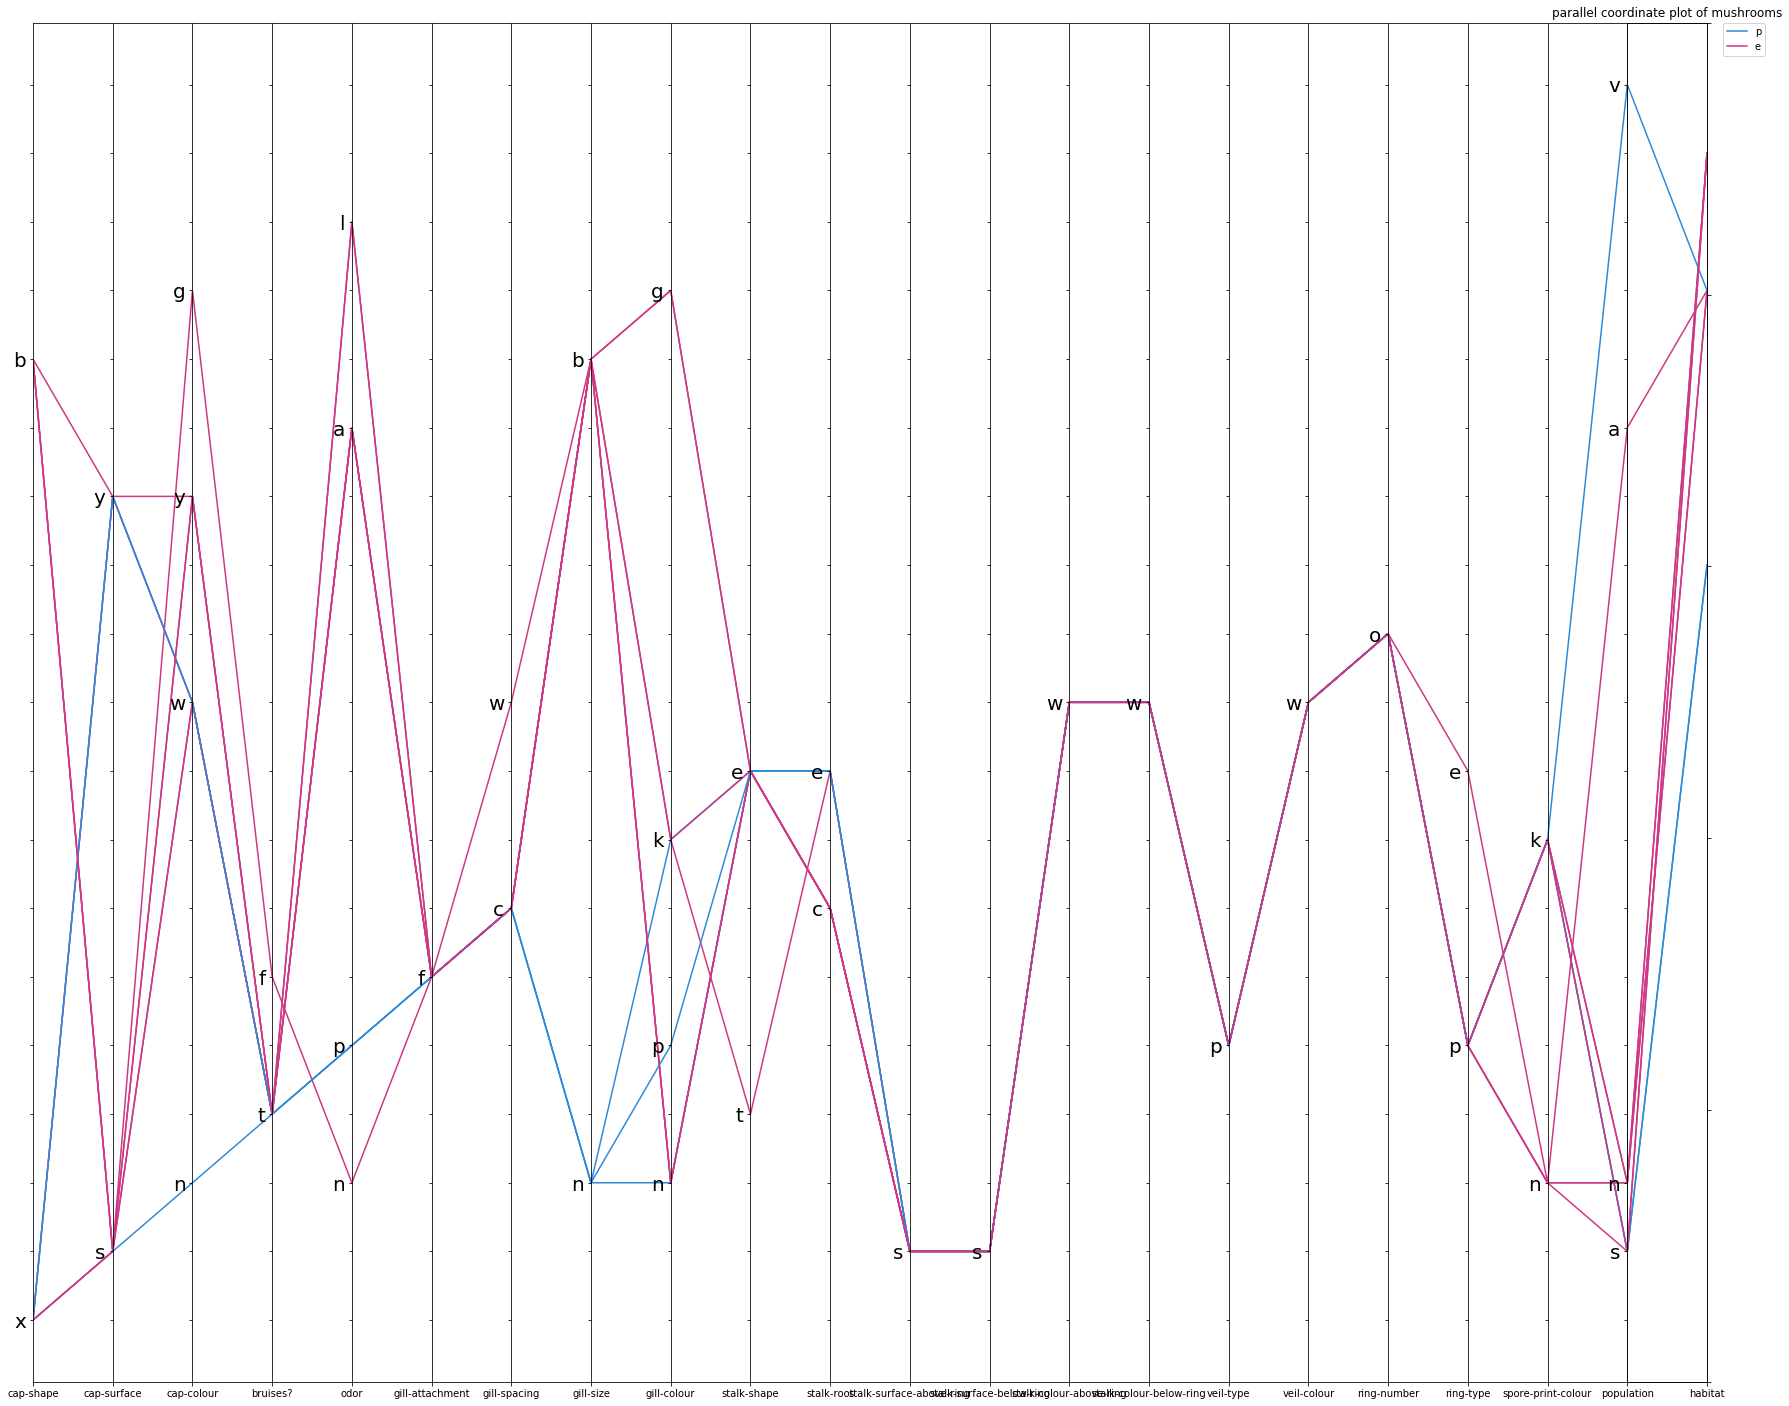

In [21]:
from matplotlib import ticker

cols = feature_names[1:]
all_feature_vals = ['x','s','n','t','p','f','c','k','e','w','o','u','y','a','b','g','l','m','v','d','r','h','?']
# all_feature_vals = ['x','s','n','t','p','f','c','k','e','w','o','u','y','a','b','g','l','m','v']
    
x = [i for i, _ in enumerate(cols)]

# create dict of categories: colours
colours = {'p': '#2e8ad8', 'e': '#cd3785'}

# Create (X-1) sublots along x axis
fig, axes = plt.subplots(1, len(x)-1, sharey=False, figsize=(30,25))

# create a dictionary containing all the unique values for each feature
# we will use these for each y-axis
feature_vals = {}
for col in cols:
    feature_vals[col] = [data[col].unique()]

data.loc[1,'class']
# Plot each row
for i, ax in enumerate(axes):
    for idx in data.index:
        class_label = data.loc[idx, 'class']
        ax.plot(x, data.loc[idx, cols], colours[class_label])
    ax.set_xlim([x[i], x[i+1]])
    
# Set the tick labels
# use only the labels which apply for each axis(ie the values for each feature)
def set_ticks_for_axis(dim, ax):
    tick_labels = list(feature_vals.values())[dim][0]
    ticks = []
    for t in all_feature_vals:
        if t not in tick_labels:
            ticks.append("")
        else:
            ticks.append(t)
    ax.set_yticklabels(ticks)
    ax.tick_params(axis='y', which='major', labelsize=20)

for dim, ax in enumerate(axes):
    ax.xaxis.set_major_locator(ticker.FixedLocator([dim]))
    set_ticks_for_axis(dim, ax)
    ax.set_xticklabels([cols[dim]])
    ax.tick_params(axis='x', which='major', labelsize=10)


# Move the final axis' ticks to the right-hand side
ax = plt.twinx(axes[-1])
dim = len(axes)
ax.xaxis.set_major_locator(ticker.FixedLocator([x[-2], x[-1]]))
set_ticks_for_axis(dim, ax)
ax.set_xticklabels([cols[-2], cols[-1]])

# Remove space between subplots
plt.subplots_adjust(wspace=0)

# Add legend to plot
plt.legend(
    [plt.Line2D((0,1),(0,0), color=colours[cat]) for cat in data['class'].unique()],
    data['class'].unique(),
    bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.)

plt.title("parallel coordinate plot of mushrooms")

plt.show()

In [9]:
df = pd.read_csv('Auto.csv')
df['horsepower'] = pd.to_numeric(df['horsepower'].replace('?', np.nan))
df['mpg'] = pd.cut(df['mpg'], [8, 16, 24, 32, 50])


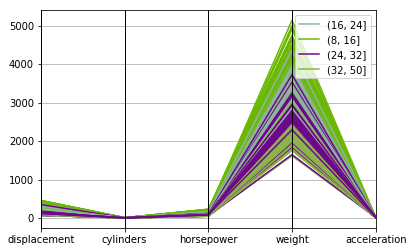

In [10]:
plt.figure()

parallel_coordinates(
    df[['mpg', 'displacement', 'cylinders', 'horsepower', 'weight', 'acceleration']], 
    'mpg')


plt.show()

{Interval(8, 16, closed='right'): '#2e8ad8', Interval(16, 24, closed='right'): '#cd3785', Interval(24, 32, closed='right'): '#c64c00', Interval(32, 50, closed='right'): '#889a00'}
AxesSubplot(0.125,0.125;0.168478x0.755)
ticks [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
AxesSubplot(0.327174,0.125;0.168478x0.755)
ticks [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
AxesSubplot(0.529348,0.125;0.168478x0.755)
ticks [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
AxesSubplot(0.731522,0.125;0.168478x0.755)
ticks [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
ticks [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]


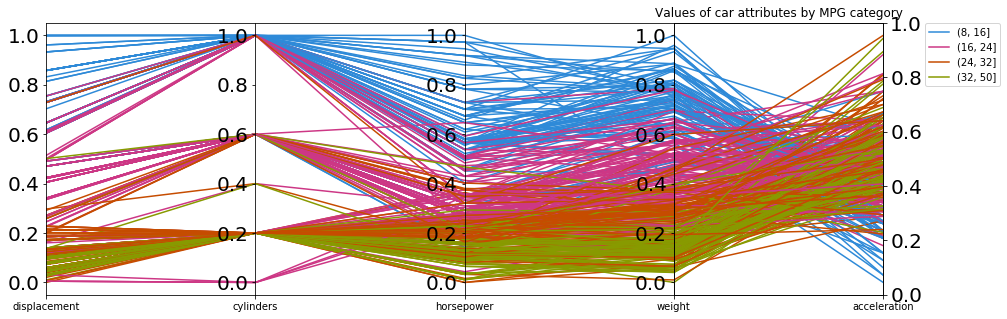

In [14]:
from matplotlib import ticker

cols = ['displacement', 'cylinders', 'horsepower', 'weight', 'acceleration']
x = [i for i, _ in enumerate(cols)]
colours = ['#2e8ad8', '#cd3785', '#c64c00', '#889a00']

# create dict of categories: colours
colours = {df['mpg'].cat.categories[i]: colours[i] for i, _ in enumerate(df['mpg'].cat.categories)}
print(colours)

# Create (X-1) sublots along x axis
fig, axes = plt.subplots(1, len(x)-1, sharey=False, figsize=(15,5))

# Get min, max and range for each column
# Normalize the data for each column
min_max_range = {}
for col in cols:
    min_max_range[col] = [df[col].min(), df[col].max(), np.ptp(df[col])]
    df[col] = np.true_divide(df[col] - df[col].min(), np.ptp(df[col]))

# Plot each row
for i, ax in enumerate(axes):
    for idx in df.index:
        mpg_category = df.loc[idx, 'mpg']
        ax.plot(x, df.loc[idx, cols], colours[mpg_category])
    ax.set_xlim([x[i], x[i+1]])
    
# Set the tick positions and labels on y axis for each plot
# Tick positions based on normalised data
# Tick labels are based on original data
def set_ticks_for_axis(dim, ax, ticks):
    min_val, max_val, val_range = min_max_range[cols[dim]]
    step = val_range / float(ticks-1)
    tick_labels = [round(min_val + step * i, 2) for i in range(ticks)]
    norm_min = df[cols[dim]].min()
    norm_range = np.ptp(df[cols[dim]])
    norm_step = norm_range / float(ticks-1)
    ticks = [round(norm_min + norm_step * i, 2) for i in range(ticks)]
    print("ticks", ticks)
    ax.yaxis.set_ticks(ticks)
    ax.set_yticklabels(tick_labels)
    ax.tick_params(axis='y', which='major', labelsize=20)

for dim, ax in enumerate(axes):
    print(ax)
    ax.xaxis.set_major_locator(ticker.FixedLocator([dim]))
    set_ticks_for_axis(dim, ax, ticks=6)
    ax.set_xticklabels([cols[dim]])
    

# Move the final axis' ticks to the right-hand side
ax = plt.twinx(axes[-1])
dim = len(axes)
ax.xaxis.set_major_locator(ticker.FixedLocator([x[-2], x[-1]]))
set_ticks_for_axis(dim, ax, ticks=6)
ax.set_xticklabels([cols[-2], cols[-1]])


# Remove space between subplots
plt.subplots_adjust(wspace=0)

# Add legend to plot
plt.legend(
    [plt.Line2D((0,1),(0,0), color=colours[cat]) for cat in df['mpg'].cat.categories],
    df['mpg'].cat.categories,
    bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.)

plt.title("Values of car attributes by MPG category")

plt.show()